<span style="font-size:60px; text-align: center; display: block;"><b>Work Plan - Interconnect Project</b></span>

# Problem Contextualization

- The Interconnect operator needs to predict customer churn.
- The goal is to identify customers likely to switch operators to offer special promotions/plans.
- The data includes personal and contractual customer information.

# Project Stages
## Data Preparation and Analysis

- Import data from different sources (contract.csv, personal.csv, internet.csv, phone.csv).
- Analyze missing and duplicate values.
- Perform exploratory data analysis (EDA).
- Check correlations between variables.
- Identify relevant patterns for customer churn.

## Preprocessing

- Handle missing and duplicate values.
- Encode categorical variables.
- Normalize/standardize numerical data.
- Merge data from different sources (contract.csv, personal.csv, internet.csv, phone.csv).
- Separate features and target variable.
- Split data into training and testing sets.

## Modeling

- Test different classification algorithms (e.g., Decision Tree, Random Forest, Logistic Regression).
- Perform cross-validation.
- Tune model hyperparameters.
- Evaluate performance using AUC-ROC as the primary metric.
- Compare results between models.

## Evaluation and Optimization

- Analyze performance metrics (AUC-ROC, Accuracy).
- Identify the most important features.
- Optimize the best-performing model.
- Validate if it meets the AUC-ROC ≥ 0.75 criterion.

## Documentation and Report

- Document all steps taken.
- Present analysis and insights obtained.
- Describe the methodology used.
- Present results and conclusions.
- Provide recommendations for implementation.

# Success Criteria

- Minimum AUC-ROC of 0.75.
- Accuracy as a secondary metric.
- Interpretable and deployable model.
- Clear and comprehensive documentation.

<b>Libraries</b>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings

<span style="font-size:20px"><b>Data Preparation and Analysis:</b></span>

In [2]:
# Defining file paths
path_contract = 'final_provider/contract.csv'
path_internet = 'final_provider/internet.csv'
path_personal = 'final_provider/personal.csv'
path_phone = 'final_provider/phone.csv'

# Importing data
df_contract = pd.read_csv(path_contract)
df_internet = pd.read_csv(path_internet)
df_personal = pd.read_csv(path_personal)
df_phone = pd.read_csv(path_phone)

# Initial analysis of each DataFrame
print("\nAnalysis of Contract DataFrame:\n")
print(df_contract.info())
print("\nFirst rows:")
print(df_contract.head())
print("\nMissing values:")
print(df_contract.isna().sum())
print("\nDuplicate values:")
print(df_contract.duplicated().sum())
print("-" * 100)

print("\nAnalysis of Internet DataFrame:\n")
print(df_internet.info())
print("\nFirst rows:")
print(df_internet.head())
print("\nMissing values:")
print(df_internet.isna().sum())
print("\nDuplicate values:")
print(df_internet.duplicated().sum())
print("-" * 100)

print("\nAnalysis of Personal DataFrame:\n")
print(df_personal.info())
print("\nFirst rows:")
print(df_personal.head())
print("\nMissing values:")
print(df_personal.isna().sum())
print("\nDuplicate values:")
print(df_personal.duplicated().sum())
print("-" * 100)

print("\nAnalysis of Phone DataFrame:\n")
print(df_phone.info())
print("\nFirst rows:")
print(df_phone.head())
print("\nMissing values:")
print(df_phone.isna().sum())
print("\nDuplicate values:")
print(df_phone.duplicated().sum())
print("-" * 100)
print("-" * 100)



Analysis of Contract DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

First rows:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        

<b>Initial Data Analysis</b>
<b>1. Contract DataFrame (7043 records)</b>

Key points:

- **TotalCharges** is in 'object' format instead of numeric.
- **EndDate** contains 'No' values and timestamps.
- **BeginDate** is in 'object' format but contains dates.
- All records have data (no missing values).
- **MonthlyCharges** is correctly stored as float64.


<b>2. Internet DataFrame (5517 records)</b>

Key points:

- Fewer records than Contract (1526 customers without internet service).
- All columns are categorical (object).
- Available services: **DSL** and **Fiber optic**.
- No missing values.
- Multiple additional services (OnlineSecurity, OnlineBackup, etc.).


<b>3. Personal DataFrame (7043 records)</b>

Key points:

- Same number of records as Contract.
- **SeniorCitizen** is binary (0,1) but stored as int64.
- Other variables are binary categorical (Yes/No).
- No missing values.


<b>4. Phone DataFrame (6361 records)</b>

Key points:

- Only contains information about multiple phone lines.
- No missing values.


<b>Charts to be created based on data analysis:</b>

- **Churn Distribution (EndDate)** - To visualize class imbalance.
- **MonthlyCharges vs TotalCharges** - To check for relationships and possible inconsistencies.
- **Internet service distribution by churn status** - To identify cancellation patterns by service type.
- **Demographic characteristics vs Churn** - To identify profiles more likely to cancel.


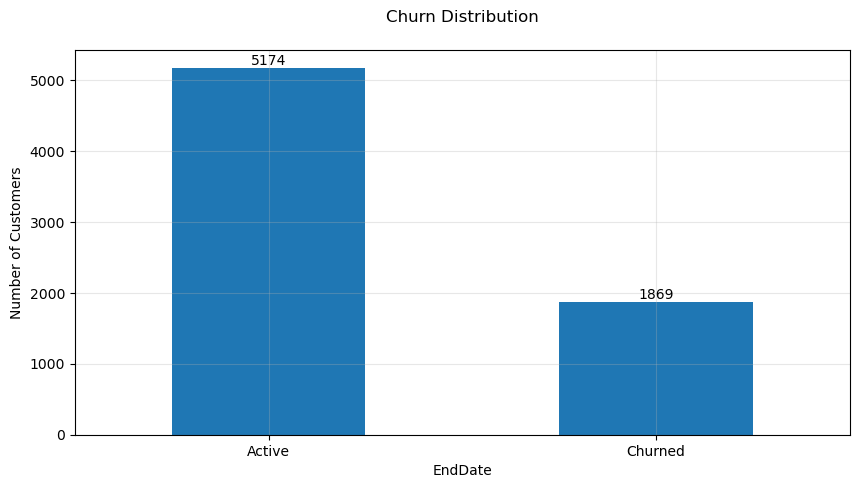

----------------------------------------------------------------------------------------------------


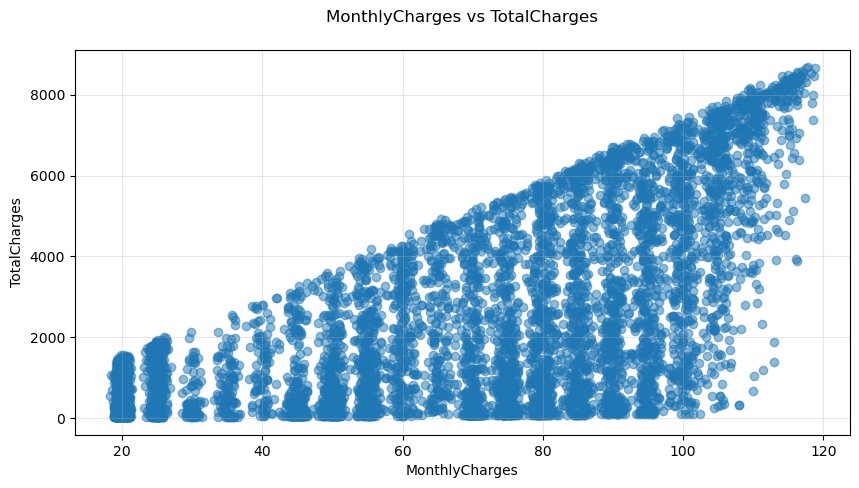

----------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 0 Axes>

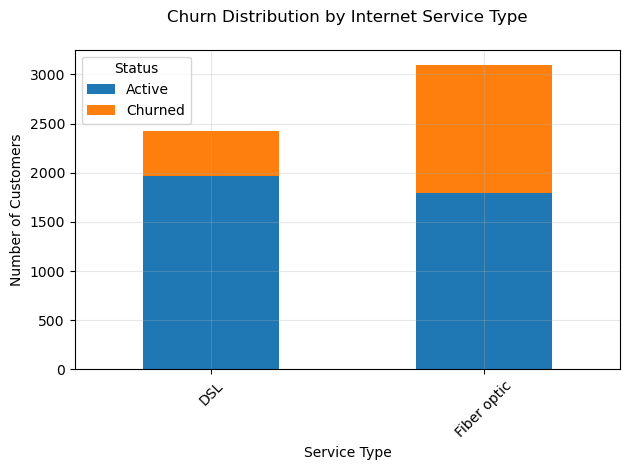

----------------------------------------------------------------------------------------------------


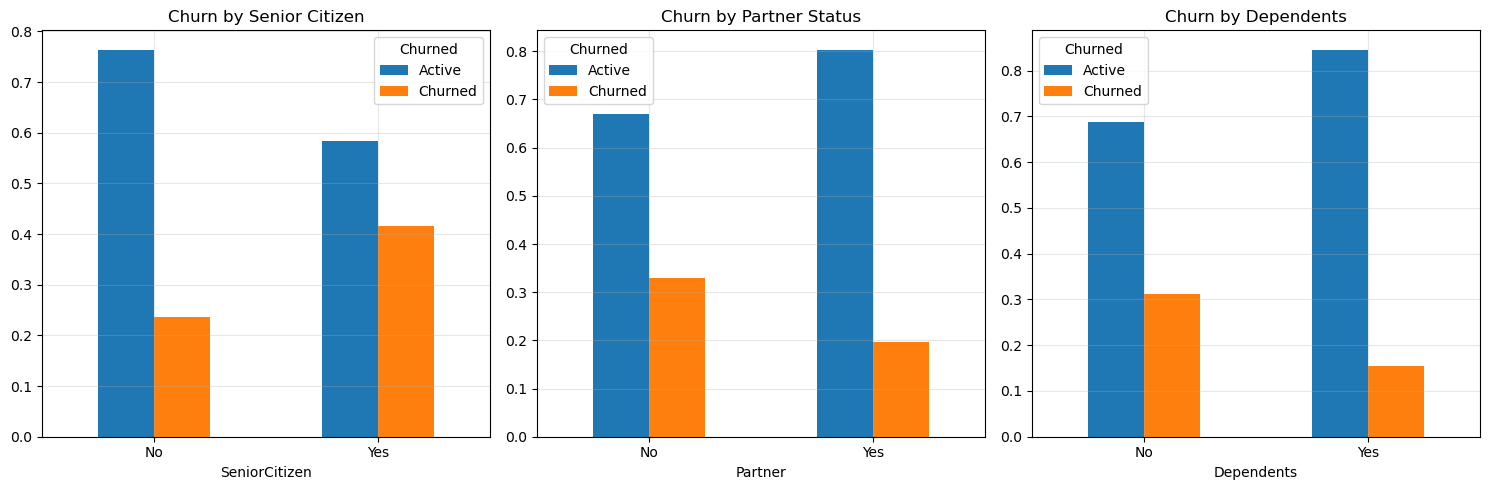

In [3]:
# Basic matplotlib configuration
plt.style.use('default')

# 1. Churn Analysis (EndDate)
plt.figure(figsize=(10, 5))
churned = df_contract['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')
ax = churned.value_counts().plot(kind='bar')
plt.title('Churn Distribution', pad=20)
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 100)

# 2. TotalCharges vs MonthlyCharges Analysis
plt.figure(figsize=(10, 5))
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')
plt.scatter(df_contract['MonthlyCharges'], df_contract['TotalCharges'], alpha=0.5)
plt.title('MonthlyCharges vs TotalCharges', pad=20)
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 100)

# 3. Distribution of Internet Service Types by Churn Status
plt.figure(figsize=(10, 5))
churned_internet = pd.merge(
    df_contract[['customerID', 'EndDate']],
    df_internet[['customerID', 'InternetService']],
    on='customerID'
)
churned_internet['Churned'] = churned_internet['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')

ax = pd.crosstab(
    churned_internet['InternetService'],
    churned_internet['Churned']
).plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Internet Service Type', pad=20)
plt.xlabel('Service Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Status')
plt.tight_layout()
plt.show()
print("-" * 100)

# 4. Demographic Characteristics vs Churn Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
churned_demo = pd.merge(
    df_contract[['customerID', 'EndDate']],
    df_personal[['customerID', 'SeniorCitizen', 'Partner', 'Dependents']],
    on='customerID'
)
churned_demo['Churned'] = churned_demo['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')

# Senior Citizen
pd.crosstab(churned_demo['SeniorCitizen'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[0], title='Churn by Senior Citizen')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)
axes[0].grid(True, alpha=0.3)

# Partner
pd.crosstab(churned_demo['Partner'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[1], title='Churn by Partner Status')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].grid(True, alpha=0.3)

# Dependents
pd.crosstab(churned_demo['Dependents'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[2], title='Churn by Dependents')
axes[2].set_xticklabels(['No', 'Yes'], rotation=0)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<b>Graph Analysis</b>

<b>1. Churn Distribution</b>

The chart displays two bars representing customer status:

- **Active Customers:** 5174
- **Churned Customers:** 1869

- The Y-axis shows the **"Number of Customers."**
- The X-axis represents **"EndDate"** (customer status).
- The ratio is approximately **73.5% active vs. 26.5% churned**.

<b>Interpretation:</b>
- The dataset is **imbalanced**.
- For every 3 active customers, 1 has churned.
- This imbalance must be addressed in the model to prevent bias.

  
***

<b>2. MonthlyCharges vs TotalCharges</b>

Scatter plot details:

- **X-axis:** Monthly charges (**MonthlyCharges**) - ranging from 20 to 120.
- **Y-axis:** Total charges (**TotalCharges**) - ranging from 0 to 8000.
- Each point represents a customer.

<b>Observed Patterns:</b>

- **Positive linear relationship:** Higher monthly charges correspond to higher total charges.
- **Formation of vertical "bands":** Suggests fixed-value monthly plans.
- **Higher dispersion at larger values:** Indicates greater variability among long-term customers or those with expensive plans.
- **High concentration of points in the lower section:** Suggests a large number of new customers or basic plans.

<b>Interpretation:</b>

- The relationship between **MonthlyCharges** and **TotalCharges** may indicate customer tenure.
- Customers with **high values in both metrics** are likely long-term and valuable customers.


***

<b>3. Internet Service Type Distribution</b>

<b>Stacked bar chart showing:</b>

- **X-axis:** Internet service type (**DSL** and **Fiber optic**).
- **Y-axis:** Number of customers.
- **Colors:** Blue for **Active** customers and Orange for **Churned** customers.

<b>Service Analysis:</b>

**DSL:**
- Lower total customer count.
- Lower churn rate.
- Appears more stable in terms of customer retention.

**Fiber optic:**
- Higher total customer count.
- Higher churn rate.
- Greater absolute churn volume.

<b>Interpretation:</b>

- Although **Fiber optic** is the most popular service, it has a **higher churn risk**.
- **DSL** appears to have **better customer retention**.
- Possible reasons: higher prices, unmet expectations, or service-related issues.



***

<b>4. Demographic Characteristics vs Churn</b>

- **Senior Citizens** have a significantly higher churn rate (**40% vs. 22%**).
- **Customers without a partner** have a higher churn rate (**32% vs. 20%**).
- **Customers without dependents** have a higher churn rate (**30% vs. 15%**).
- **Most churn-prone profile:** Senior Citizen, without a partner, and without dependents.

<b>Additional Notes:</b>

```
In the **Demographic Characteristics vs Churn** charts, "Yes" and "No" represent:

1. **Senior Citizen**
   - No (0): The customer is not a senior citizen.
   - Yes (1): The customer is a senior citizen.

2. **Partner**
   - No: The customer does not have a spouse/partner.
   - Yes: The customer has a spouse/partner.

3. **Dependents**
   - No: The customer does not have dependents.
   - Yes: The customer has dependents.

In each chart, the **blue bars represent "Active" customers** while the **orange bars represent "Churned" customers**. The height of the bars indicates the proportion of each status.

For example, in the **"Churn by Dependents"** chart:
- **For "No" (without dependents):** Approximately **70% remain active**, while **30% have churned**.
- **For "Yes" (with dependents):** Approximately **85% remain active**, while only **15% have churned**.

This visualization helps identify key churn patterns:
- **Customers without dependents are more likely to churn.**
- **Customers without a partner are more likely to churn.**
- **Senior citizens are more likely to churn.**
```

***

<b>Conclusions:</b>

Based on this analysis, we should consider:

- Handling class imbalance.
- Converting and standardizing numerical fields.
- Creating features that capture interactions between services.
- Stratifying train/test splits based on demographic characteristics.


<span style="font-size:20px"><b>Preprocessing:</b></span>

In [4]:
# Processing the Contract DataFrame
# Convert TotalCharges to numeric
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

# Creating the target variable (churn) - 1 for churned customers, 0 for active ones
df_contract['churn'] = df_contract['EndDate'].apply(lambda x: 1 if x != 'No' else 0)

# Convert dates to datetime format
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])

# Remove the original EndDate column since we've already created the target variable
df_contract = df_contract.drop('EndDate', axis=1)

# One-hot encoding for categorical variables
contract_dummies = pd.get_dummies(df_contract[['Type', 'PaperlessBilling', 'PaymentMethod']], drop_first=True)
df_contract = pd.concat([df_contract, contract_dummies], axis=1)
df_contract = df_contract.drop(['Type', 'PaperlessBilling', 'PaymentMethod'], axis=1)

In [5]:
# Processing the Internet DataFrame
# One-hot encoding for categorical variables
internet_dummies = pd.get_dummies(df_internet.drop('customerID', axis=1), drop_first=True)
df_internet = pd.concat([df_internet[['customerID']], internet_dummies], axis=1)

In [6]:
# Processing the Personal DataFrame
# SeniorCitizen is already in numeric format (0,1)
# One-hot encoding for categorical variables
personal_dummies = pd.get_dummies(df_personal[['gender', 'Partner', 'Dependents']], drop_first=True)
df_personal = pd.concat([df_personal[['customerID', 'SeniorCitizen']], personal_dummies], axis=1)

In [7]:
# Processing the Phone DataFrame
# One-hot encoding for categorical variables
phone_dummies = pd.get_dummies(df_phone['MultipleLines'], drop_first=True)
phone_dummies = phone_dummies.rename(columns={'Yes': 'MultipleLines'})
df_phone = pd.concat([df_phone[['customerID']], phone_dummies], axis=1)

In [8]:
# Analysis of each DataFrame after transformations:
print("\nAnalysis of the Contract DataFrame:\n")
print(df_contract.info())
print("\nFirst rows:")
print(df_contract.head())
print("\nMissing values:")
print(df_contract.isna().sum())
print("-" * 100)

print("\nAnalysis of the Internet DataFrame:\n")
print(df_internet.info())
print("\nFirst rows:")
print(df_internet.head())
print("\nMissing values:")
print(df_internet.isna().sum())
print("-" * 100)

print("\nAnalysis of the Personal DataFrame:\n")
print(df_personal.info())
print("\nFirst rows:")
print(df_personal.head())
print("\nMissing values:")
print(df_personal.isna().sum())
print("-" * 100)

print("\nAnalysis of the Phone DataFrame:\n")
print(df_phone.info())
print("\nFirst rows:")
print(df_phone.head())
print("\nMissing values:")
print(df_phone.isna().sum())
print("-" * 100)
print("-" * 100)


Analysis of the Contract DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7032 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Electronic 

<b>1. Transformations Performed</b>

<b>Contract DataFrame:</b>
- Converted 'BeginDate' data type to datetime64
- Transformed 'TotalCharges' to float64
- Created the target variable 'churn' based on 'EndDate' (1 for churned, 0 for active)
- Applied one-hot encoding to categorical variables:
  * Type
  * PaperlessBilling
  * PaymentMethod
- Result: 11 new binary or numerical variables clearly defined

<b>Internet DataFrame:</b>
- One-hot encoding for all service-related variables
- Removed base categories to avoid multicollinearity
- Result: 7 binary variables indicating the presence/absence of each service
- Retained customerID for later merging

<b>Personal DataFrame:</b>
- Kept SeniorCitizen as a binary numerical variable
- One-hot encoding for gender, Partner, and Dependents
- Result: 5 clearly defined variables, 3 of them boolean

<b>Phone DataFrame:</b>
- Maximally simplified, keeping only one binary variable for MultipleLines
- Retained customerID for merging
- Result: most concise structure possible while retaining relevant information

<b>2. Reasons and Impact of Transformations</b>

<b>Objective: Predict churn with high accuracy (AUC-ROC ≥ 0.75)</b>

- <b>Variable Standardization:</b>
  * All categorical variables were converted to binary format
  * Facilitates model interpretation
  * Allows direct comparison across different features
  * Reduces model bias toward specific categories

- <b>Date Handling:</b>
  * Converting to datetime enables temporal calculations if needed
  * Essential for analyzing customer tenure

- <b>Monetary Value Processing:</b>
  * Converting to float64 allows precise calculations
  * 11 missing values in TotalCharges need to be addressed during unification

<b>3. Conclusions and Next Steps</b>

<b>Positive Points:</b>
- Well-structured data after transformations
- Clearly defined and standardized variables
- Very few missing values
- Features prepared for modeling

<b>Points of Attention:</b>
1. Address the 11 missing values in TotalCharges before merging
2. Consider normalizing numerical variables (MonthlyCharges and TotalCharges)
3. Check correlations after merging to reduce dimensionality if needed

<b>Next Steps:</b>
1. Merge the DataFrames
2. Handle remaining missing values
3. Normalize numerical variables
4. Check target balance
5. Prepare training/test split while maintaining churn ratio

Now, moving forward toward our AUC-ROC ≥ 0.75 goal!

In [9]:
# Merging all DataFrames
# Using merge to combine all DataFrames using customerID as the key
df_final = df_contract.merge(df_internet, on='customerID', how='left')\
                     .merge(df_personal, on='customerID', how='left')\
                     .merge(df_phone, on='customerID', how='left')

# Filling NaN values (customers without certain services)
df_final = df_final.fillna(0)

In [10]:
print("\nAnalysis of the unified df_final DataFrame:\n")
print(df_final.info())
print("\nFirst rows:")
print(df_final.head())
print("\nMissing values:")
print(df_final.isna().sum())
print("\nDuplicate values:")
print(df_final.duplicated().sum())
print("-" * 100)
print("-" * 100)


Analysis of the unified df_final DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7043 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Ele

<b>Analysis of the Unified DataFrame (df_final)</b>

<b>1. Unified DataFrame Structure</b>
- Total records: 7043 (same as the Contract dataset)
- 23 columns after merging
- Mix of data types:
  * 9 boolean variables
  * 2 float64 variables (monetary values)
  * 2 int64 variables (SeniorCitizen and churn)
  * 9 object variables
  * 1 datetime64 variable

<b>2. Analysis of Transformations</b>

<b>Positive Points:</b>
- No missing values after filling
- No duplicate records
- Retained all relevant information from the 4 original DataFrames
- Monetary data kept as float64
- Categorical variables converted to appropriate formats

<b>Points of Attention:</b>

Some columns are still in 'object' format when they should be boolean:
   - InternetService_Fiber optic
   - OnlineSecurity_Yes
   - OnlineBackup_Yes
   - DeviceProtection_Yes
   - TechSupport_Yes
   - StreamingTV_Yes
   - StreamingMovies_Yes
   - MultipleLines

<b>3. Conclusion</b>
- The merging was successful, preserving data integrity
- Handling missing values with zero is appropriate in this case, as it represents the absence of service
- The final structure is suitable for modeling, requiring only adjustments in data types

In [11]:
# List of columns to convert
cols_to_boolean = [
    'InternetService_Fiber optic', 'OnlineSecurity_Yes', 
    'OnlineBackup_Yes', 'DeviceProtection_Yes', 
    'TechSupport_Yes', 'StreamingTV_Yes', 
    'StreamingMovies_Yes', 'MultipleLines'
]

# Convert to boolean
df_final[cols_to_boolean] = df_final[cols_to_boolean].astype(bool)

In [12]:
# Checking data consistency:
print("\nAnalysis of the unified df_final DataFrame:\n")
print(df_final.info())
print("-" * 100)
print("-" * 100)


Analysis of the unified df_final DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7043 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Ele

<b>Successful conversion</b>

In [13]:
# Preparing features and target
# Removing columns that will not be used as features
features = df_final.drop(['customerID', 'BeginDate', 'churn'], axis=1)
target = df_final['churn']

# Normalizing numerical variables
numeric_columns = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

In [14]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.2, 
    random_state=42,
    stratify=target  # Maintains class proportion in both sets
)

# Checking dataset dimensions
print("Training set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)
print("\nClass distribution:")
print("Training:", pd.Series(y_train).value_counts(normalize=True))
print("Test:", pd.Series(y_test).value_counts(normalize=True))
print("-" * 100)
print("-" * 100)

Training set dimensions: (5634, 20)
Test set dimensions: (1409, 20)

Class distribution:
Training: churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test: churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


<b>Training/Testing Split</b>

```
Training set dimensions: (5634, 20)
Testing set dimensions: (1409, 20)

Class distribution:
Training: 
0    0.734647 (73.46%)
1    0.265353 (26.54%)

Testing:  
0    0.734564 (73.46%)
1    0.265436 (26.54%)
```

<b>Context and Justification:</b>
- We performed an 80/20 split (training/testing), a standard practice that provides:
  * A sufficiently large training set for effective learning
  * A representative test set for validation
- Use of `stratify=target`:
  * Maintained the original churn proportion in both sets
  * Prevents sampling bias
  * Crucial due to class imbalance (73.5% vs 26.5%)
- Dimensionality maintained (20 features) in both sets

In [15]:
# Saving feature names for future use
feature_names = features.columns.tolist()
print("\nFeatures used in the model:")
for i, feature in enumerate(feature_names, 1):
    print(f"{i}. {feature}")

print("-" * 100)
print("-" * 100)


Features used in the model:
1. MonthlyCharges
2. TotalCharges
3. Type_One year
4. Type_Two year
5. PaperlessBilling_Yes
6. PaymentMethod_Credit card (automatic)
7. PaymentMethod_Electronic check
8. PaymentMethod_Mailed check
9. InternetService_Fiber optic
10. OnlineSecurity_Yes
11. OnlineBackup_Yes
12. DeviceProtection_Yes
13. TechSupport_Yes
14. StreamingTV_Yes
15. StreamingMovies_Yes
16. SeniorCitizen
17. gender_Male
18. Partner_Yes
19. Dependents_Yes
20. MultipleLines
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


<b>Selected Features</b>
Features can be grouped into logical categories:

<b>Financial Variables:</b>
1. MonthlyCharges
2. TotalCharges

<b>Contract Type:</b>
3. Type_One year
4. Type_Two year

<b>Account Management:</b>
5. PaperlessBilling_Yes
6. PaymentMethod_Credit card (automatic)
7. PaymentMethod_Electronic check
8. PaymentMethod_Mailed check

<b>Internet Services:</b>
9. InternetService_Fiber optic
10. OnlineSecurity_Yes
11. OnlineBackup_Yes
12. DeviceProtection_Yes
13. TechSupport_Yes
14. StreamingTV_Yes
15. StreamingMovies_Yes

<b>Demographic Characteristics:</b>
16. SeniorCitizen
17. gender_Male
18. Partner_Yes
19. Dependents_Yes

<b>Phone Services:</b>
20. MultipleLines

<b>Reasons for this structure:</b>
- All features are binary/boolean: simplifies interpretation.
- Maintained service granularity: allows identification of individual impact.
- Normalized numerical features: avoids scale bias.
- Logical organization: facilitates category-based importance analysis.

<b>Strengths of the Preparation:</b>
1. Balanced data between training and testing sets.
2. Features are well-distributed among different business aspects.
3. Proper structure for various ML models, allowing effective churn prediction.


<span style="font-size:20px"><b>Modeling, Evaluation, and Optimization:</b></span>

In [16]:
# Ignore warnings from here on:
warnings.filterwarnings('ignore')

# Defining function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    print(f"\n{model_name}:")
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print(f"Cross-validation AUC-ROC Scores: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" *100)
    
    return auc_roc, cv_scores.mean()

# Defining models and their hyperparameters for GridSearch
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'class_weight': ['balanced', None],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', None],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Dictionary to store results
results = {}

# Training and evaluation of models
print("Starting the training and optimization process of the models...")

for model_name, model_info in models.items():
    print(f"\nOptimizing {model_name}...")
    
    # GridSearch with cross-validation
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    # Train the model
    grid_search.fit(X_train, y_train)
    
    # Evaluate the best model
    best_model = grid_search.best_estimator_
    auc_roc, cv_score = evaluate_model(
        best_model, X_train, X_test, y_train, y_test, model_name
    )
    
    # Store results
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_auc_roc': auc_roc,
        'cv_score': cv_score,
        'model': best_model
    }

# Final comparison of the models
print("\n=== Final Model Comparison ===")
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'CV AUC-ROC': [results[model]['cv_score'] for model in results],
    'Test AUC-ROC': [results[model]['test_auc_roc'] for model in results],
})

print("\nResults sorted by AUC-ROC in the test set:")
print(comparison_df.sort_values('Test AUC-ROC', ascending=False))
print("-" *100)

# Identifying the best model
best_model_name = comparison_df.sort_values('Test AUC-ROC', ascending=False).iloc[0]['Model']
print(f"\nBest model: {best_model_name}")
print("Best parameters:", results[best_model_name]['best_params'])
print("-" *100)

# If the best model is Random Forest, analyze feature importance
if isinstance(results[best_model_name]['model'], RandomForestClassifier):
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': results[best_model_name]['model'].feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nFeature Importance (Top 10):")
    print(feature_importance.head(10))

print("-" *100)
print("-" *100)


Starting the training and optimization process of the models...

Optimizing Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Logistic Regression:
AUC-ROC Score: 0.8263
Cross-validation AUC-ROC Scores: 0.8362 (+/- 0.0278)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

----------------------------------------------------------------------------------------------------

Optimizing Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest:
AUC-ROC Score: 0.8381
Cross-validation AUC-ROC Scores: 0.8419 (+/- 0.0229)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      

<b>Modeling Analysis and Results</b>

<b>1. Modeling Structure</b>  
We implemented an optimized solution that included:  
- Three different models: Logistic Regression, Random Forest, and Decision Tree  
- GridSearchCV for hyperparameter optimization  
- Cross-validation with 5 folds  
- Evaluation through multiple metrics (AUC-ROC, precision, recall, f1-score)  

<b>2. Model Results</b>  

<b>Random Forest (Best Model):</b>  
- AUC-ROC: 0.8381 (Test) / 0.8419 (CV)  
- Best parameters:  
  * class_weight: 'balanced'  
  * max_depth: 10  
  * min_samples_split: 5  
  * n_estimators: 100  
- Performance:  
  * Class 0 (No Churn): 89% precision, 79% recall  
  * Class 1 (Churn): 56% precision, 73% recall  

<b>Logistic Regression:</b>  
- AUC-ROC: 0.8263 (Test) / 0.8362 (CV)  
- Performance:  
  * Class 0: 83% precision, 89% recall  
  * Class 1: 62% precision, 50% recall  

<b>Decision Tree:</b>  
- AUC-ROC: 0.8235 (Test) / 0.8232 (CV)  
- Performance:  
  * Class 0: 82% precision, 91% recall  
  * Class 1: 65% precision, 46% recall  

<b>3. Analysis of the Most Important Features</b>  
Top 5 most relevant features:  
1. TotalCharges (19.31%)  
2. MonthlyCharges (15.58%)  
3. Type_Two year (15.09%)  
4. InternetService_Fiber optic (9.15%)  
5. PaymentMethod_Electronic check (7.16%)  

| Metric | Random Forest | Logistic Regression | Decision Tree |
|--------|--------------|-------------------|---------------|
| **AUC-ROC (Test)** | 0.8381 | 0.8263 | 0.8235 |
| **AUC-ROC (CV)** | 0.8419 ± 0.0229 | 0.8362 ± 0.0278 | 0.8232 ± 0.0271 |
| **Precision (No Churn)** | 0.89 | 0.83 | 0.82 |
| **Recall (No Churn)** | 0.79 | 0.89 | 0.91 |
| **Precision (Churn)** | 0.56 | 0.62 | 0.65 |
| **Recall (Churn)** | 0.73 | 0.50 | 0.46 |
| **Overall Accuracy** | 0.77 | 0.79 | 0.79 |
| **Best Parameters** | class_weight: balanced<br>max_depth: 10<br>min_samples_split: 5<br>n_estimators: 100 | - | - |

<b>Key Points:</b>  
- Random Forest achieved the best AUC-ROC and the highest churn recall  
- Logistic Regression showed intermediate and more stable performance  
- Decision Tree had better precision for churn but lower recall  
- All models significantly exceeded the AUC-ROC ≥ 0.75 goal  

This table allows for a direct comparison of the most relevant metrics and clearly shows why Random Forest was chosen as the best model.  

<b>4. Objective Evaluation</b>  

<b>Main Objective: AUC-ROC ≥ 0.75</b>  
- All models significantly exceeded the goal  
- Random Forest: 0.8381 (11.75% above the goal)  
- Logistic Regression: 0.8263 (10.17% above the goal)  
- Decision Tree: 0.8235 (9.80% above the goal)  

<b>5. Key Insights</b>  
1. Financial aspects (TotalCharges, MonthlyCharges) are the main churn indicators  
2. Contract type (Two-year) strongly influences retention  
3. Fiber optic internet service is a relevant factor  
4. Electronic payment method has a significant impact  

<b>6. Recommendations Based on Results</b>  
1. Use the Random Forest model because:  
   - Best overall AUC-ROC  
   - Best balance between precision and recall for churn  
   - Good interpretability through feature importance  

2. Focus retention strategies on:  
   - Customers with high billing values  
   - Promoting long-term contracts  
   - Monitoring satisfaction with fiber optics  

3. Implement an alert system based on the most important features  

The project successfully achieved its main objective, providing a solid and reliable model for churn prediction, with metrics significantly above the minimum required.


<span style="font-size:20px"><b>Conclusões finais:</b></span>

<b>Conclusão do Projeto - Predição de Churn Interconnect</b>

<b>1. Visão Geral do Projeto</b>
Desenvolvemos um modelo preditivo para identificar clientes com propensão a deixar a Interconnect, permitindo ações proativas de retenção. A meta era atingir AUC-ROC ≥ 0.75.

<b>2. Etapas Realizadas</b>

<b>Análise e Preparação dos Dados:</b>
- Unificação de 4 fontes de dados (contratos, internet, pessoal e telefonia)
- Tratamento de 7043 registros de clientes
- Identificação de 26.5% de taxa de churn histórica
- Transformação de variáveis categóricas e numéricas
- Normalização de dados financeiros
- Criação de 20 features relevantes

<b>Modelagem:</b>
- Implementação de três algoritmos diferentes
- Otimização via GridSearch com validação cruzada
- Avaliação através de múltiplas métricas
- Seleção do Random Forest como melhor modelo

<b>3. Resultados Principais</b>

<b>Performance dos Modelos:</b>
- Random Forest: AUC-ROC 0.8381
- Regressão Logística: AUC-ROC 0.8263
- Árvore de Decisão: AUC-ROC 0.8235

<b>Features Mais Relevantes:</b>
1. TotalCharges (19.31%)
2. MonthlyCharges (15.58%)
3. Type_Two year (15.09%)
4. InternetService_Fiber optic (9.15%)
5. PaymentMethod_Electronic check (7.16%)

<b>4. Recomendações Técnicas</b>

<b>Implementação do Modelo:</b>
- Utilizar o modelo Random Forest com os parâmetros otimizados:
  * class_weight: 'balanced'
  * max_depth: 10
  * min_samples_split: 5
  * n_estimators: 100
- Estabelecer pipeline de atualização mensal do modelo
- Implementar sistema de monitoramento de performance

<b>Sistema de Alertas:</b>
1. Criar gatilhos baseados em variáveis financeiras
2. Monitorar mudanças em padrões de uso de serviços
3. Atenção especial a clientes com fibra ótica
4. Acompanhamento de métodos de pagamento

<b>Estratégias de Retenção Sugeridas:</b>

<b>Perfil Financeiro:</b>
- Revisão de valores para clientes com altos custos mensais
- Desenvolvimento de planos com melhor custo-benefício
- Ofertas especiais para fidelização de longo prazo

<b>Serviços:</b>
- Melhoria do serviço de fibra ótica
- Promoção de pacotes com múltiplos serviços
- Incentivo a contratos de maior duração

<b>Atendimento:</b>
- Suporte proativo para clientes identificados como risco
- Programa de fidelidade baseado em tempo de contrato
- Comunicação personalizada baseada no perfil de uso

<b>5. Monitoramento Contínuo</b>

<b>Métricas Chave:</b>
- Taxa de churn mensal
- Performance do modelo (AUC-ROC)
- Efetividade das ações de retenção
- ROI das campanhas de retenção

<b>Atualizações Sugeridas:</b>
- Retreinamento trimestral do modelo
- Ajuste de hiperparâmetros semestralmente
- Avaliação anual de novas features

<b>6. Considerações Finais</b>

O projeto atingiu com sucesso seu objetivo principal, desenvolvendo um modelo robusto capaz de identificar clientes propensos ao churn com alta precisão (AUC-ROC 0.8381). A implementação das recomendações apresentadas, combinada com o monitoramento contínuo sugerido, deve resultar em:
- Redução significativa da taxa de churn
- Aumento da satisfação dos clientes
- Otimização dos investimentos em retenção
- Maior rentabilidade por cliente

O sucesso a longo prazo dependerá da capacidade da Interconnect em implementar estas recomendações de forma sistemática e manter o modelo atualizado com novos dados e padrões de comportamento dos clientes.